# INTRODUCTION TO ML: FINAL PROJECT

## About this project

### For this project, I decided to do a customer churn analysis on the telecommunications industry. We will first start by doing some EDA and data cleaning (fixing data types, dropping NaNs...), then we'll do some visualization. The last part will focus on the model building and performance, with a short conclusion on the learning process and what worked and what didn't.
### The dataset is recent and comes from Kaggle (https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics), and is around 1.5mb in csv format

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('telecom_customer_churn.csv')

## PART 1: EDA AND VISUALIZATION

In [3]:
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [5]:
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [6]:
data.shape

(7043, 38)

In [7]:
data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [9]:
data['Tenure in Months'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: Tenure in Months, Length: 72, dtype: int64

In [10]:
np.mean(data['Tenure in Months'])

32.38676700269772

In [11]:
data['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

### As we can see, most of our customers decided to stay. Moreover, on average, our customers decide to stay with us for a little less than three years.

In [12]:
data['Churn Category'].value_counts()

Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: Churn Category, dtype: int64

In [13]:
data['Married'].value_counts()

No     3641
Yes    3402
Name: Married, dtype: int64

In [14]:
data['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [15]:
data['Monthly Charge'].value_counts()

20.05    60
19.85    45
19.95    44
19.90    44
20.00    43
         ..
43.65     1
34.55     1
47.60     1
58.70     1
67.85     1
Name: Monthly Charge, Length: 1591, dtype: int64

In [16]:
data['Monthly Charge'].max()

118.75

In [17]:
data['Internet Service'].value_counts()

Yes    5517
No     1526
Name: Internet Service, dtype: int64

In [18]:
data['Phone Service'].value_counts()

Yes    6361
No      682
Name: Phone Service, dtype: int64

In [19]:
data['Churn Category']

0                   NaN
1                   NaN
2            Competitor
3       Dissatisfaction
4       Dissatisfaction
             ...       
7038                NaN
7039    Dissatisfaction
7040                NaN
7041                NaN
7042                NaN
Name: Churn Category, Length: 7043, dtype: object

In [20]:
data['Contract'].value_counts()

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: Contract, dtype: int64

In [21]:
data['Offer'].value_counts()

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64

In [22]:
data['Total Extra Data Charges'].value_counts()

0      6315
10      138
40       62
30       58
20       51
80       47
100      44
50       43
150      42
130      40
140      38
60       36
90       35
70       34
110      32
120      28
Name: Total Extra Data Charges, dtype: int64

In [23]:
data['Total Long Distance Charges'].value_counts()

0.00       682
15.60        4
48.96        4
22.86        4
597.60       3
          ... 
200.75       1
217.62       1
2288.43      1
1417.68      1
142.04       1
Name: Total Long Distance Charges, Length: 6068, dtype: int64

### first step in Data cleaning: dropping irrelevant columns before further analysis

In [24]:
data_1 = data.drop(['Customer ID','Number of Dependents','Zip Code', 'Latitude',
                    'Longitude','Online Security','Online Backup',
                    'Paperless Billing', 'Payment Method','Contract',
                    'Total Extra Data Charges', 'Total Long Distance Charges',
                    'Internet Type',
                    'Total Long Distance Charges', 'Churn Category',
                    'Churn Reason'], axis=1).copy()

In [25]:
data_1.head()

,Gender,Age,Married,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Monthly Charge,Total Charges,Total Refunds,Total Revenue,Customer Status
0,Female,37,Yes,Frazier Park,2,9,None,Yes,42.39,No,...,Yes,Yes,No,No,Yes,65.6,593.30,0.00,974.81,Stayed
1,Male,46,No,Glendale,0,9,None,Yes,10.69,Yes,...,No,No,Yes,Yes,No,-4.0,542.40,38.33,610.28,Stayed
2,Male,50,No,Costa Mesa,0,4,Offer E,Yes,33.65,No,...,No,No,No,No,Yes,73.9,280.85,0.00,415.45,Churned
3,Male,78,Yes,Martinez,1,13,Offer D,Yes,27.82,No,...,No,Yes,Yes,No,Yes,98.0,1237.85,0.00,1599.51,Churned
4,Female,75,Yes,Camarillo,3,3,None,Yes,7.38,No,...,Yes,Yes,No,No,Yes,83.9,267.40,0.00,289.54,Churned


In [26]:
data_1.shape

(7043, 23)

In [27]:
data_1.columns

Index(['Gender', 'Age', 'Married', 'City', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Revenue', 'Customer Status'],
      dtype='object')

### Fixing data types and dropping Nas

In [28]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   City                               7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  6361 non-null   float64
 9   Multiple Lines                     6361 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Avg Monthly GB Download            5517 non-null   float

In [29]:
for column in data_1.columns:
  print(column, data_1[column].isnull().sum())


Gender 0
Age 0
Married 0
City 0
Number of Referrals 0
Tenure in Months 0
Offer 0
Phone Service 0
Avg Monthly Long Distance Charges 682
Multiple Lines 682
Internet Service 0
Avg Monthly GB Download 1526
Device Protection Plan 1526
Premium Tech Support 1526
Streaming TV 1526
Streaming Movies 1526
Streaming Music 1526
Unlimited Data 1526
Monthly Charge 0
Total Charges 0
Total Refunds 0
Total Revenue 0
Customer Status 0


In [30]:
data_2 = data_1.dropna().copy()

In [31]:
data_2.shape

(4835, 23)

In [32]:
for column in data_2.columns:
  print(column, data_2[column].isnull().sum())

Gender 0
Age 0
Married 0
City 0
Number of Referrals 0
Tenure in Months 0
Offer 0
Phone Service 0
Avg Monthly Long Distance Charges 0
Multiple Lines 0
Internet Service 0
Avg Monthly GB Download 0
Device Protection Plan 0
Premium Tech Support 0
Streaming TV 0
Streaming Movies 0
Streaming Music 0
Unlimited Data 0
Monthly Charge 0
Total Charges 0
Total Refunds 0
Total Revenue 0
Customer Status 0


In [33]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 7041
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4835 non-null   object 
 1   Age                                4835 non-null   int64  
 2   Married                            4835 non-null   object 
 3   City                               4835 non-null   object 
 4   Number of Referrals                4835 non-null   int64  
 5   Tenure in Months                   4835 non-null   int64  
 6   Offer                              4835 non-null   object 
 7   Phone Service                      4835 non-null   object 
 8   Avg Monthly Long Distance Charges  4835 non-null   float64
 9   Multiple Lines                     4835 non-null   object 
 10  Internet Service                   4835 non-null   object 
 11  Avg Monthly GB Download            4835 non-null   float

In [34]:
Yes_No_mapper = {'Yes':1, 'No':0}
value_mapper = {'None':0, 'Offer A':1, 'Offer B':2, 'Offer C':3, 'Offer D':4, 'Offer E':5}

### In order for our model to properly work, we need all of the features to be numerical in nature, instead of having a string or object.

In [35]:
data_2 = data_2[data_2['Customer Status'] != 'Joined']
data_2['Customer Status'] = data_2['Customer Status'].apply(lambda x: 1 if x=='Churned' else 0) # Maps the relevant features to be numerical values so our model can work
data_2['Gender'] = data_2['Gender'].apply(lambda x: 1 if x=='Male' else 0)
data_2['Married'] = data_2['Married'].apply(lambda x: Yes_No_mapper[x])
data_2['Phone Service'] = data_2['Phone Service'].apply(lambda x: Yes_No_mapper[x])
data_2['Multiple Lines'] = data_2['Multiple Lines'].apply(lambda x: Yes_No_mapper[x])
data_2['Internet Service'] = data_2['Internet Service'].apply(lambda x: Yes_No_mapper[x])
data_2['Device Protection Plan'] = data_2['Device Protection Plan'].apply(lambda x: Yes_No_mapper[x])
data_2['Premium Tech Support'] = data_2['Premium Tech Support'].apply(lambda x: Yes_No_mapper[x])
data_2['Streaming TV'] = data_2['Streaming TV'].apply(lambda x: Yes_No_mapper[x])
data_2['Streaming Movies'] = data_2['Streaming Movies'].apply(lambda x: Yes_No_mapper[x])
data_2['Streaming Music'] = data_2['Streaming Music'].apply(lambda x: Yes_No_mapper[x])
data_2['Unlimited Data'] = data_2['Unlimited Data'].apply(lambda x: Yes_No_mapper[x])
data_2['Offer'] = data_2['Offer'].apply(lambda x: value_mapper[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 7041
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4601 non-null   int64  
 1   Age                                4601 non-null   int64  
 2   Married                            4601 non-null   int64  
 3   City                               4601 non-null   object 
 4   Number of Referrals                4601 non-null   int64  
 5   Tenure in Months                   4601 non-null   int64  
 6   Offer                              4601 non-null   int64  
 7   Phone Service                      4601 non-null   int64  
 8   Avg Monthly Long Distance Charges  4601 non-null   float64
 9   Multiple Lines                     4601 non-null   int64  
 10  Internet Service                   4601 non-null   int64  
 11  Avg Monthly GB Download            4601 non-null   float

## DATA VISUALIZATION

In [37]:
sns.set_theme(style='darkgrid')

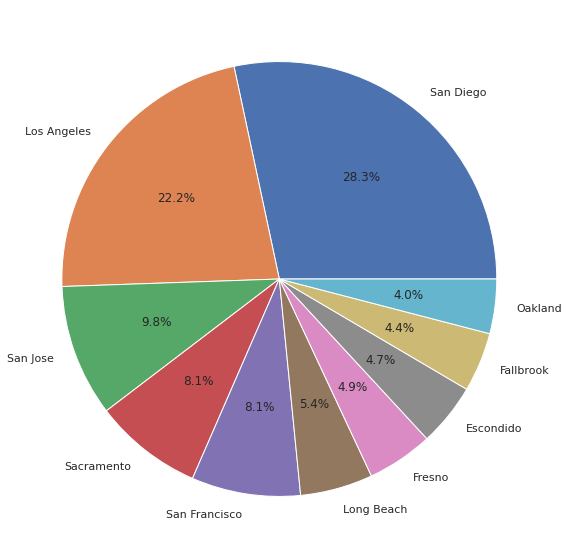

In [38]:
ten_most_popular_cities = data_2['City'].value_counts()[:10].values
ten_most_popular_cities_labes = data_2['City'].value_counts()[:10].index.tolist()
plt.figure(figsize=(20,10))
plt.pie(ten_most_popular_cities, labels=ten_most_popular_cities_labes, autopct='%1.1f%%')
plt.show()

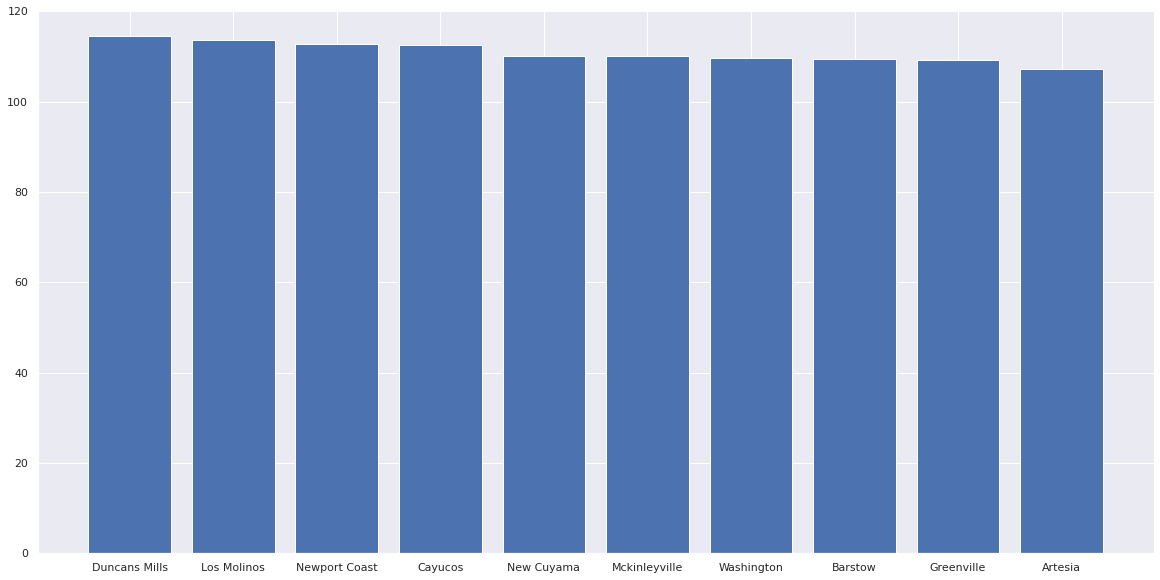

In [39]:
avearge_by_city = data_2.groupby('City')['Monthly Charge'].mean().sort_values(ascending=False)
ten_most_expensive_cities_labels = avearge_by_city[:10].index.to_list()
ten_most_expensive_cities = avearge_by_city[:10].values
plt.figure(figsize=(20,10))
plt.bar(ten_most_expensive_cities_labels, ten_most_expensive_cities)
plt.show()

Text(0.5, 1.0, 'Average price evolution')

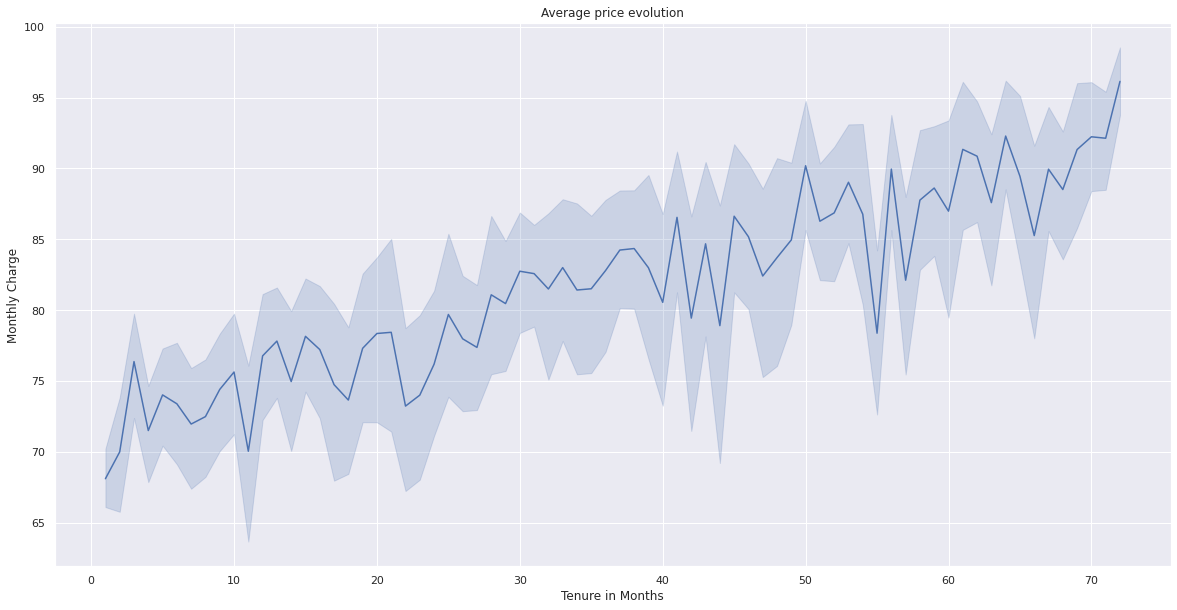

In [40]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Tenure in Months', y='Monthly Charge', data=data_2).set_title(
    'Average price evolution'
)

Text(0.5, 1.0, 'The most popular type of offer')

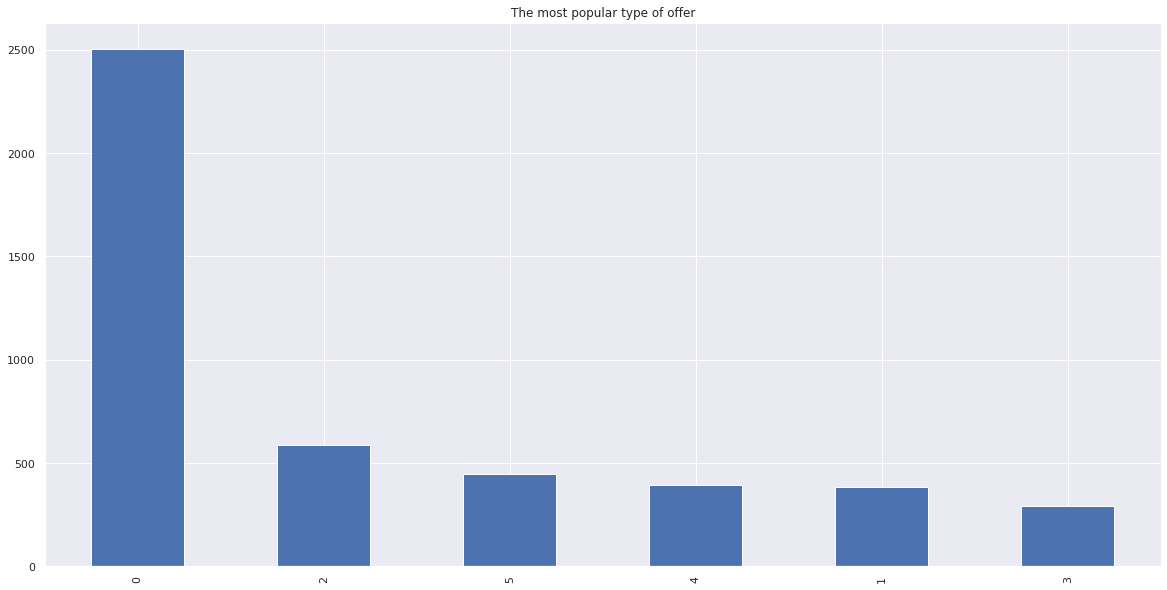

In [41]:
plt.figure(figsize=(20,10))
data_2['Offer'].value_counts().plot.bar().set_title(
    'The most popular type of offer'
)

Text(0.5, 1.0, 'Number of active lines for each client')

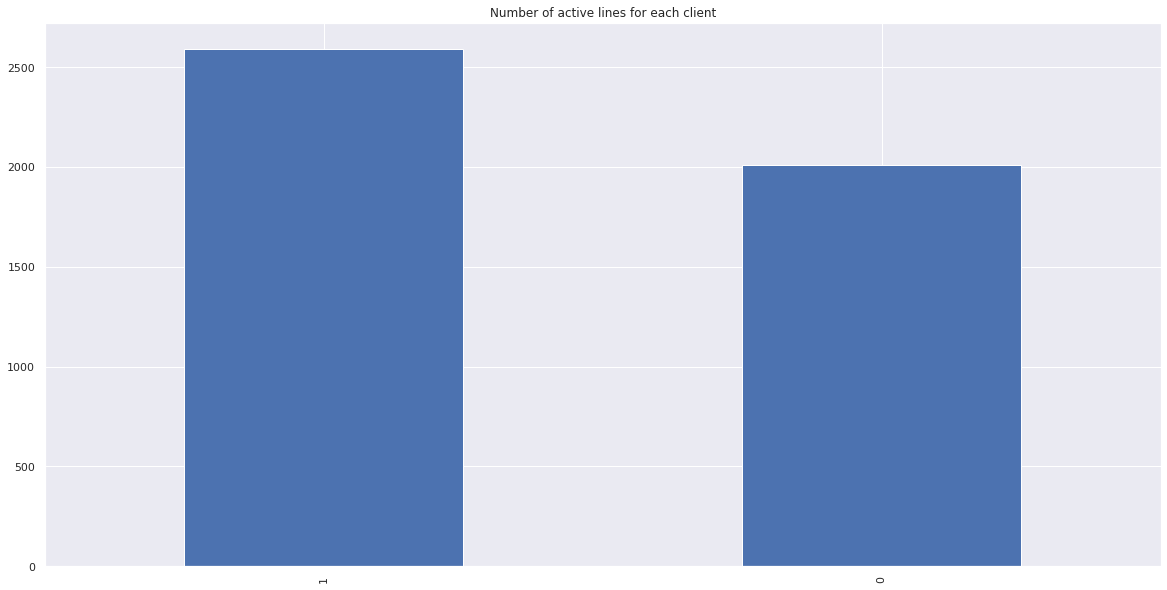

In [42]:
plt.figure(figsize=(20,10))
data_2['Multiple Lines'].value_counts().plot.bar().set_title(
    'Number of active lines for each client'
)

Text(0.5, 1.0, 'Gender breakdown')

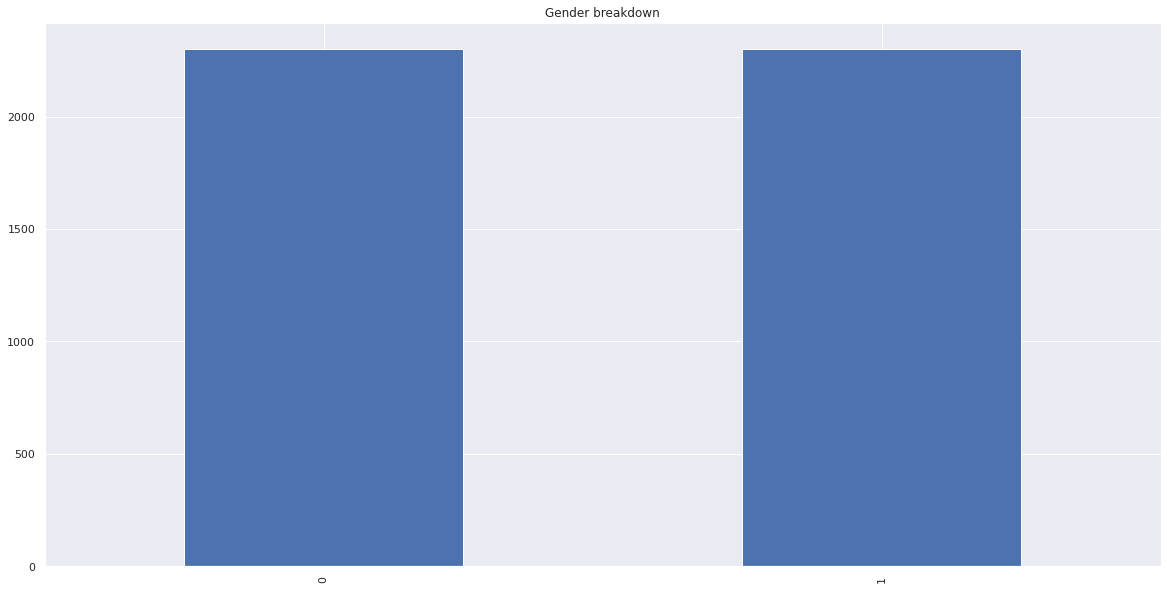

In [43]:
plt.figure(figsize=(20,10))
data_2['Gender'].value_counts().plot.bar().set_title(
    'Gender breakdown'
)

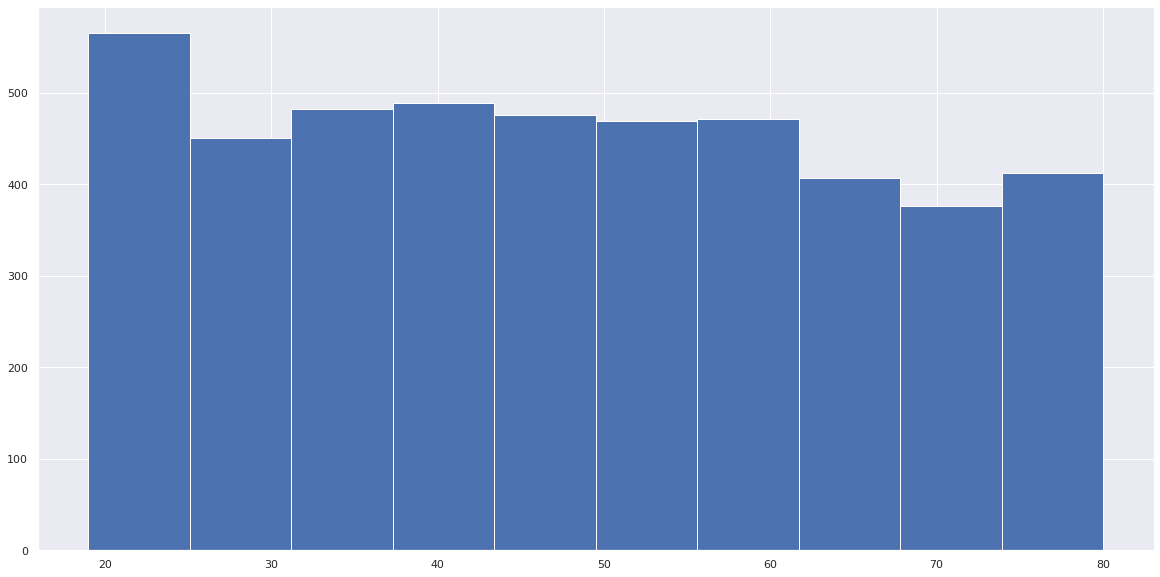

In [44]:
plt.figure(figsize=(20,10))
plt.hist(data_2['Age'])
plt.show()

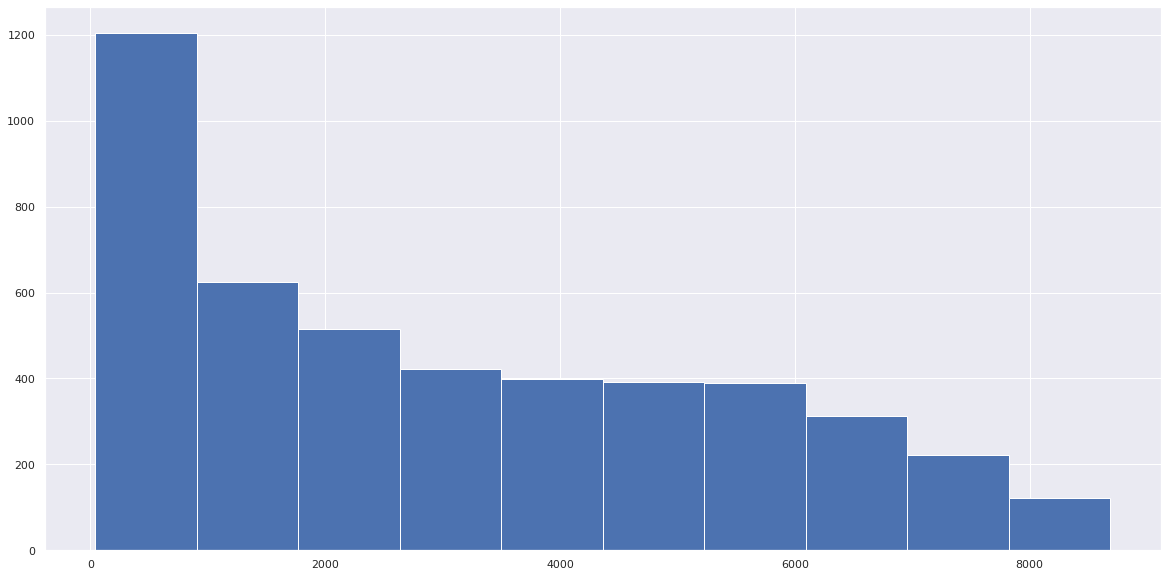

In [45]:
plt.figure(figsize=(20,10))
plt.hist(data_2['Total Charges'])
plt.show()

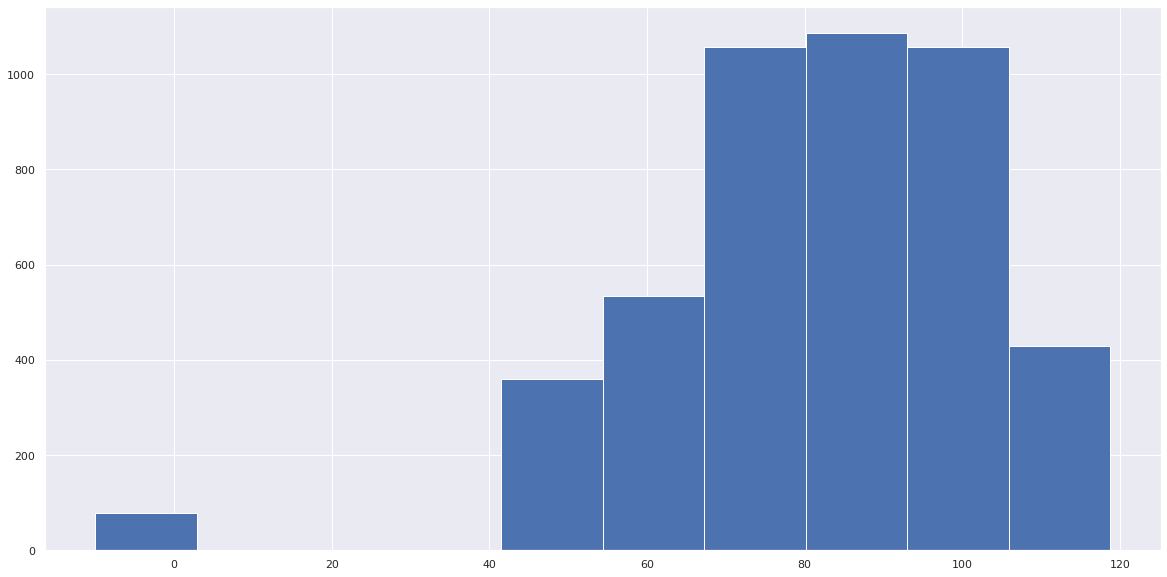

In [46]:
plt.figure(figsize=(20,10))
plt.hist(data_2['Monthly Charge'])
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


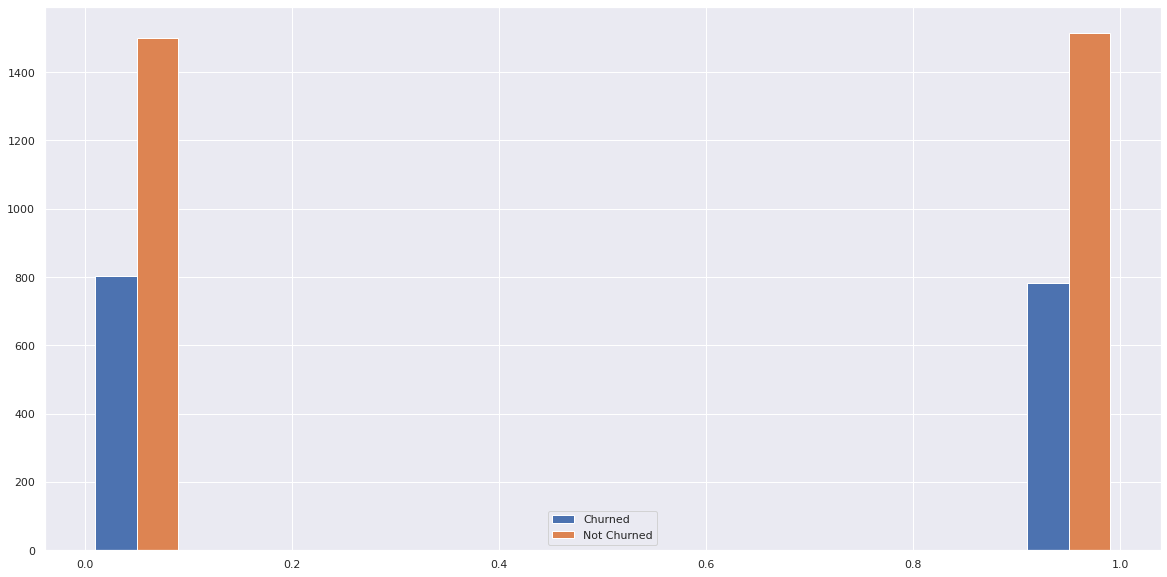

In [47]:
churned_gender = data_2[data_2['Customer Status']==1].Gender
not_churned_gender = data_2[data_2['Customer Status']==0].Gender
plt.figure(figsize=(20,10))
plt.hist([churned_gender, not_churned_gender], 
         label = ['Churned', 'Not Churned'])
plt.legend()
plt.show()

### Final part of feature engineering

In [48]:
final_data = data_2.copy()

### For our model, we keep only those features that appears to be the most relevant

In [49]:
final_data = final_data[['Gender', 'Age', 'Married', 'City', 'Tenure in Months',
                         'Offer', 'Monthly Charge', 'Total Refunds', 
                         'Total Revenue', 'Customer Status']]

In [50]:
final_data.head()

,Gender,Age,Married,City,Tenure in Months,Offer,Monthly Charge,Total Refunds,Total Revenue,Customer Status
0,0,37,1,Frazier Park,9,0,65.6,0.00,974.81,0
1,1,46,0,Glendale,9,0,-4.0,38.33,610.28,0
2,1,50,0,Costa Mesa,4,5,73.9,0.00,415.45,1
3,1,78,1,Martinez,13,4,98.0,0.00,1599.51,1
4,0,75,1,Camarillo,3,0,83.9,0.00,289.54,1


In [51]:
final_data.corr()['Customer Status'].abs().sort_values(ascending=False)

Customer Status     1.000000
Tenure in Months    0.471463
Total Revenue       0.407782
Married             0.199354
Offer               0.141357
Age                 0.094953
Total Refunds       0.042967
Gender              0.008673
Monthly Charge      0.003226
Name: Customer Status, dtype: float64

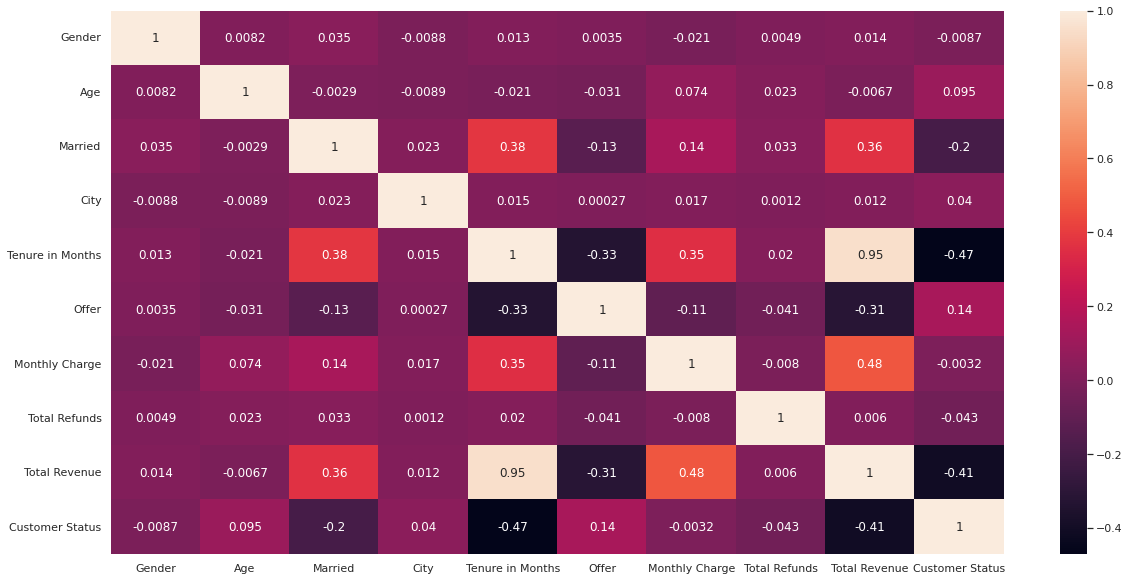

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot=True)

In [52]:
city_dummies = pd.get_dummies(final_data['City'])

In [53]:
city_dummies

,Acampo,Acton,Adelanto,Adin,Agoura Hills,Aguanga,Ahwahnee,Alamo,Albany,Albion,...,Wrightwood,Yermo,Yorba Linda,Yorkville,Yountville,Yreka,Yuba City,Yucaipa,Yucca Valley,Zenia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Doing one-hot encoding gives us a matrix that is too large for logistic regression. Instead, we'll use the label encoder from sklearn 

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### We need to replace the cities with their respective codes

In [55]:
label_encoder = LabelEncoder()
final_data['City'] = label_encoder.fit(final_data['City']).transform(final_data['City']) # replace the names of the Cities with their "codes"

In [56]:
final_data

,Gender,Age,Married,City,Tenure in Months,Offer,Monthly Charge,Total Refunds,Total Revenue,Customer Status
0,0,37,1,338,9,0,65.60,0.00,974.81,0
1,1,46,0,360,9,0,-4.00,38.33,610.28,0
2,1,50,0,217,4,5,73.90,0.00,415.45,1
3,1,78,1,576,13,4,98.00,0.00,1599.51,1
4,0,75,1,136,3,0,83.90,0.00,289.54,1
...,...,...,...,...,...,...,...,...,...,...
7035,0,20,0,543,7,5,94.05,0.00,888.88,0
7036,0,53,0,427,1,5,70.15,0.00,112.24,1
7038,0,20,0,481,13,4,55.15,0.00,1349.74,0
7039,1,40,1,811,22,4,85.10,0.00,2230.10,1


## PART 2: MODEL BUILDING

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

### Split our data with our target and features that will be used for training

In [58]:
y = final_data['Customer Status']   # Target variable
X = final_data.drop(['Customer Status'], axis=1) # Features used for classification

In [59]:
scaling = StandardScaler()
X = scaling.fit_transform(X)

In [60]:
y

0       0
1       0
2       1
3       1
4       1
       ..
7035    0
7036    1
7038    0
7039    1
7041    0
Name: Customer Status, Length: 4601, dtype: int64

In [61]:
X

array([[-0.99934818, -0.62747676,  0.99501352, ..., -0.73780879,
        -0.26108348, -0.97040596],
       [ 1.00065224, -0.10904692, -1.00501147, ..., -4.02899788,
         4.36485978, -1.08977302],
       [ 1.00065224,  0.12136634, -1.00501147, ..., -0.34532503,
        -0.26108348, -1.15357102],
       ...,
       [-0.99934818, -1.60673313, -1.00501147, ..., -1.23196002,
        -0.26108348, -0.84763336],
       [ 1.00065224, -0.45466681,  0.99501352, ...,  0.18429161,
        -0.26108348, -0.55935533],
       [ 1.00065224, -1.54912981,  0.99501352, ..., -0.63141259,
        -0.26108348,  0.27224538]])

In [62]:
from sklearn.model_selection import train_test_split

### Create a 80/20 train test split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [64]:
log_reg = LogisticRegression()

In [65]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [66]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

In [67]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

## PART 3: RESULTS AND CONCLUSION

In [68]:
np.abs(y_train, y_pred_train).value_counts(normalize=True)

0    0.655978
1    0.344022
Name: Customer Status, dtype: float64

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_test, y_pred_test)

array([[505,  96],
       [120, 200]])

In [71]:
precision_score(y_test, y_pred_test)

0.6756756756756757

In [72]:
recall_score(y_test, y_pred_test)

0.625

In [73]:
accuracy_score(y_test, y_pred_test)

0.7654723127035831

In [74]:
f1_score(y_test, y_pred_test)

0.6493506493506493

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [76]:
proba_pred_y = log_reg.predict_proba(X_test)[::,1]

In [77]:
fpr, tpr, _ = roc_curve(y_test, proba_pred_y)

In [78]:
auc = roc_auc_score(y_test, proba_pred_y)

In [79]:
auc

0.8126299916805324

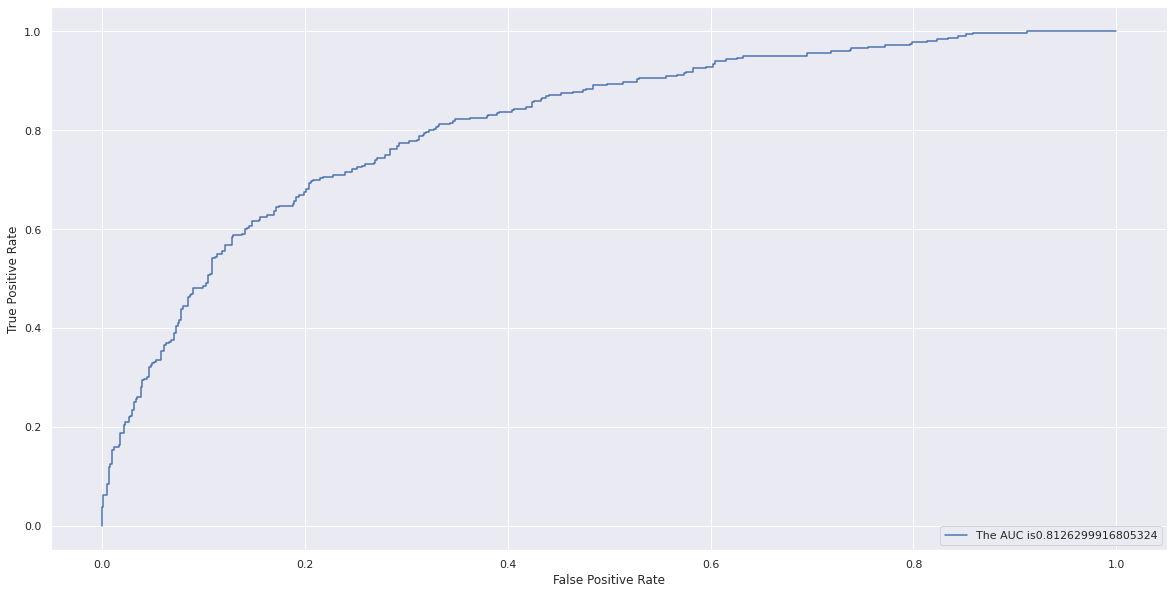

In [80]:
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='The AUC is'+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## CONCLUSION:

## The logistic regression is appropriate for these kind of tasks since it's a binary classification. Our model did fairly well, however we could probably increase the performance with better data (more relevant features, bigger size...)
## I would also try different scaling/normalizing methods for the feature engineering, as well as doing one-hot encoding for the cities instead of encoding their labels
## Before this model, I used SVC but it didn't seem appropriate with this kind of data.
